In [34]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset

ada_data=pd.read_csv(r'./csv_files/breast_cancer_dataset.csv')

In [3]:
# displaying the dataset 

ada_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#finding the shape

ada_data.shape

(569, 31)

In [7]:
# finding the descriptive statistics 

ada_data.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


In [8]:
# finding the meta data 

ada_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
# columns name

ada_data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [10]:
# checking for null values

ada_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
# checking the percentage of missing value

ada_data.isnull().sum()/len(ada_data)

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
target                     0.0
dtype: float64

In [15]:
# finding the distribution of the target variable

print("Distribution of the target variable:")
print(ada_data['target'].value_counts())

Distribution of the target variable:
target
1    357
0    212
Name: count, dtype: int64


In [18]:
# dividing the dataset into independent and dependent feature

x=ada_data.iloc[:,:-1] # selects the independent features
y=ada_data.iloc[:,-1] # selects the target feature

In [23]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [26]:
# Now we are spliting the data into training and testing part

x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [29]:
# displaying the traing data

x_train.head(), y_train.head()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 68         9.029         17.33           58.79      250.5          0.10660   
 181       21.090         26.57          142.70     1311.0          0.11410   
 63         9.173         13.86           59.20      260.9          0.07721   
 248       10.650         25.22           68.01      347.0          0.09657   
 60        10.170         14.88           64.55      311.9          0.11340   
 
      mean compactness  mean concavity  mean concave points  mean symmetry  \
 68            0.14130         0.31300              0.04375         0.2111   
 181           0.28320         0.24870              0.14960         0.2395   
 63            0.08751         0.05988              0.02180         0.2341   
 248           0.07234         0.02379              0.01615         0.1897   
 60            0.08061         0.01084              0.01290         0.2743   
 
      mean fractal dimension  ...  worst radius  worst

In [30]:
# displaying the shape

x_train.shape, x_test.shape 

((455, 30), (114, 30))

In [31]:
# displaying the testing data

x_test, y_test

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 204        12.47         18.60           81.09      481.9          0.09965   
 70         18.94         21.31          123.60     1130.0          0.09009   
 131        15.46         19.48          101.70      748.9          0.10920   
 431        12.40         17.68           81.47      467.8          0.10540   
 540        11.54         14.44           74.65      402.9          0.09984   
 ..           ...           ...             ...        ...              ...   
 486        14.64         16.85           94.21      666.0          0.08641   
 75         16.07         19.65          104.10      817.7          0.09168   
 249        11.52         14.93           73.87      406.3          0.10130   
 238        14.22         27.85           92.55      623.9          0.08223   
 265        20.73         31.12          135.70     1419.0          0.09469   
 
      mean compactness  mean concavity  mean conca

In [32]:
# displaying the shape 

y_train.shape, y_test.shape 

((455,), (114,))

In [36]:
# selecting the model

model_ada = AdaBoostClassifier(n_estimators=50, random_state=42)
model_ada

AdaBoostClassifier(random_state=42)

In [37]:
# Train the classifier on the training data

model_ada.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [38]:
# Make predictions on the test data

prediction_data = model_ada.predict(x_test)

In [39]:
prediction_data

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [40]:
# creating the confusion matrix

conf = confusion_matrix(y_test, prediction_data)
print(f'The confusion matrix of Random Forest Classifier is: \n{conf}')

The confusion matrix of Random Forest Classifier is: 
[[41  2]
 [ 1 70]]


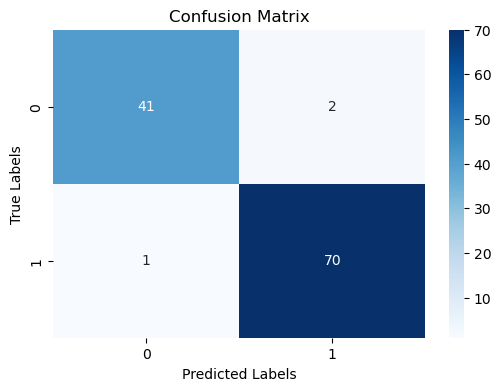

In [41]:
# visualization of confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [42]:
# finding the correct and false prediction and the accuracy using the confusion matrix

shape_conf = conf.shape
correct_Pred = 0
false_Pred = 0

for row in range(shape_conf[0]):
    for column in range(shape_conf[1]):
        if row == column:
            correct_Pred +=conf[row,column]
        else:
            false_Pred += conf[row,column]
print('Correct predictions: ', correct_Pred)
print('False predictions', false_Pred)
print ('Accuracy of the ADA-Boost Classifier is: ', correct_Pred/(conf.sum()))

Correct predictions:  111
False predictions 3
Accuracy of the Random Forest Classifier is:  0.9736842105263158


In [43]:
# findiing the accuracy of the model

print ("The accuracy of ADA-Boost Classifier is : ", accuracy_score(y_test, prediction_data))

The accuracy of ADA-Boost Classifier is :  0.9736842105263158


In [44]:
# finding the F1-SCORE of the model

print("The F1-Score of ADA-Boost Classifier is: ",f1_score(y_test,prediction_data))

The F1-Score of ADA-Boost Classifier is:  0.9790209790209791


In [45]:
# finding the Precision of the model

precision = precision_score(y_test, prediction_data)
print("Precision Score of ADA-Boost Classifier is:", precision)

Precision Score of ADA-Boost Classifier is: 0.9722222222222222


In [46]:
#finding the RECALL-SCORE of the model

recall = recall_score(y_test, prediction_data)
print("Recall Score of ADA-Boost Classifier is:", recall)

Recall Score of ADA-Boost Classifier is: 0.9859154929577465
